In [5]:
# First we have the 20 years (2005-2024) COT reports data
import zipfile
import os

# Specify the directory where the zipped files are located
zip_dir = "C:/Users/jason wang/Desktop/工作/Fiisual/CFTC vs Oil Price/zipped file"
my_dir = "C:/Users/jason wang/Desktop/計量實作"

# Loop through all files in the directory
count = 0
for filename in os.listdir(zip_dir):
    # Check if the file is a ZIP file
    if filename.endswith(".zip"):
        # Extract the ZIP file
        with zipfile.ZipFile(os.path.join(zip_dir, filename), "r") as zip_ref:
            zip_ref.extractall(my_dir)
            extracted_file_list = os.listdir(my_dir)
            for i in extracted_file_list:
                if not i.endswith('.xls'):
                    extracted_file_list.remove(i)
            os.rename(extracted_file_list[count], '{}.xls'.format(count+2005))
            count += 1

In [11]:
# Grab all data about Crude Oil
import pandas as pd

# Create an empty list to store the data frames
dfs = []

# Loop through all files in the directory
for filename in os.listdir(my_dir):
    # Check if the file is an Excel file
    if filename.endswith(".xls"):
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(os.path.join(my_dir, filename))
        
        # Select the desired rows from the DataFrame
        # Assuming you want to select rows where the value in column 'A' is greater than 10
        selected_rows = df.loc[df['Market_and_Exchange_Names'] == 'WTI-PHYSICAL - NEW YORK MERCANTILE EXCHANGE']
        selected_rows1 = df.loc[df['Market_and_Exchange_Names'] == 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE']
        
        # Append the selected rows to the list of data frames
        dfs.append(selected_rows)
        dfs.append(selected_rows1)

# Concatenate all the data frames into a single data frame
combined_df = pd.concat(dfs, ignore_index=True)

# Write the combined data frame to a new Excel file
combined_df.to_excel("dataframe.xlsx", index=False)

In [3]:
import pandas as pd
df = pd.read_excel("dataframe.xlsx")
df.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_MM_DD_YYYY,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,NonComm_Positions_Long_All,NonComm_Positions_Short_All,...,Conc_Net_LE_8_TDR_Short_Old,Conc_Gross_LE_4_TDR_Long_Other,Conc_Gross_LE_4_TDR_Short_Other,Conc_Gross_LE_8_TDR_Long_Other,Conc_Gross_LE_8_TDR_Short_Other,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units
0,"CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE E...",51227,2005-12-27,67651,NYME,1,67,818841,120638,144892,...,14.7,0,0,0,0,0,0,0,0,"(CONTRACTS OF 1,000 BARRELS)"
1,"CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE E...",51220,2005-12-20,67651,NYME,1,67,813180,120418,137409,...,16.3,0,0,0,0,0,0,0,0,"(CONTRACTS OF 1,000 BARRELS)"
2,"CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE E...",51213,2005-12-13,67651,NYME,1,67,869209,132646,162587,...,15.2,0,0,0,0,0,0,0,0,"(CONTRACTS OF 1,000 BARRELS)"
3,"CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE E...",51206,2005-12-06,67651,NYME,1,67,861412,131832,161359,...,15.5,0,0,0,0,0,0,0,0,"(CONTRACTS OF 1,000 BARRELS)"
4,"CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE E...",51129,2005-11-29,67651,NYME,1,67,836948,121151,164924,...,15.7,0,0,0,0,0,0,0,0,"(CONTRACTS OF 1,000 BARRELS)"


In [4]:
# Clean the data
df = df.rename(columns={"Report_Date_as_MM_DD_YYYY": "Date", "NonComm_Positions_Long_All": "Long", "NonComm_Positions_Short_All": "Short", 
                        "NonComm_Postions_Spread_All": "Spread"}) # Rename the Columns
df = df[['Date','Long','Short','Spread']] # Keep the report release day, long position and short postion, and the spread
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date') # Set the date as index
df = df.sort_values(by=['Date']) # in time order
df.head()

,Long,Short,Spread
Date,,,
2005-01-04,74567,67020,74091
2005-01-11,79563,70949,90144
2005-01-18,86451,70526,85441
2005-01-25,98204,64354,90677
2005-02-01,100507,69555,96217


In [5]:
# Calculate net long postions (NL) and percent net long positions (PNL)
df['NL'] = df['Long'] - df['Short']
df['PNL'] = df['NL'] / (df['Long'] + df['Short'] + 2*df['Spread'])
df.tail()

,Long,Short,Spread,NL,PNL
Date,,,,,
2024-05-07,360533,145089,699676,215444,0.113096
2024-05-14,330395,127352,674480,203043,0.112383
2024-05-21,332352,113052,681570,219300,0.121258
2024-05-28,344619,100693,707486,243926,0.131123
2024-06-04,333481,122776,695785,210705,0.114029


In [6]:
# Get WTI Crude Oil Historical Price
import yfinance as yf
wti = yf.download('CL=F', start='2005-01-04', end='2024-06-05')
wti.head()

C:\Users\jason wang\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-04,42.180000,44.130001,41.849998,43.910000,43.910000,100665
2005-01-05,43.900002,44.000000,42.599998,43.389999,43.389999,91011
2005-01-06,43.389999,45.750000,42.799999,45.560001,45.560001,122411
2005-01-07,45.500000,46.099998,44.750000,45.430000,45.430000,99725
2005-01-10,45.599998,47.299999,45.200001,45.330002,45.330002,103573


In [7]:
# Merge it with the net positions
df = pd.concat([df, wti['Close']], join='inner',axis=1)
df = df.rename(columns={'Close':'Price'})
# Calculate the return
import numpy as np
df['Return'] = np.append(np.nan, np.diff(df['Price'])/df['Price'][:-1])
df

,Long,Short,Spread,NL,PNL,Price,Return
Date,,,,,,,
2005-01-04,74567,67020,74091,7547,0.026045,43.910000,NaN
2005-01-11,79563,70949,90144,8614,0.026040,45.680000,0.040310
2005-01-18,86451,70526,85441,15925,0.048573,48.380001,0.059107
2005-01-25,98204,64354,90677,33850,0.098426,49.639999,0.026044
2005-02-01,100507,69555,96217,30952,0.085386,47.119999,-0.050766
...,...,...,...,...,...,...,...
2024-05-07,360533,145089,699676,215444,0.113096,78.379997,-0.043330
2024-05-14,330395,127352,674480,203043,0.112383,78.019997,-0.004593
2024-05-21,332352,113052,681570,219300,0.121258,79.260002,0.015893


In [8]:
df.to_csv('Research Data.csv') # Save the dataframe to a csv file

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Research Data.csv')

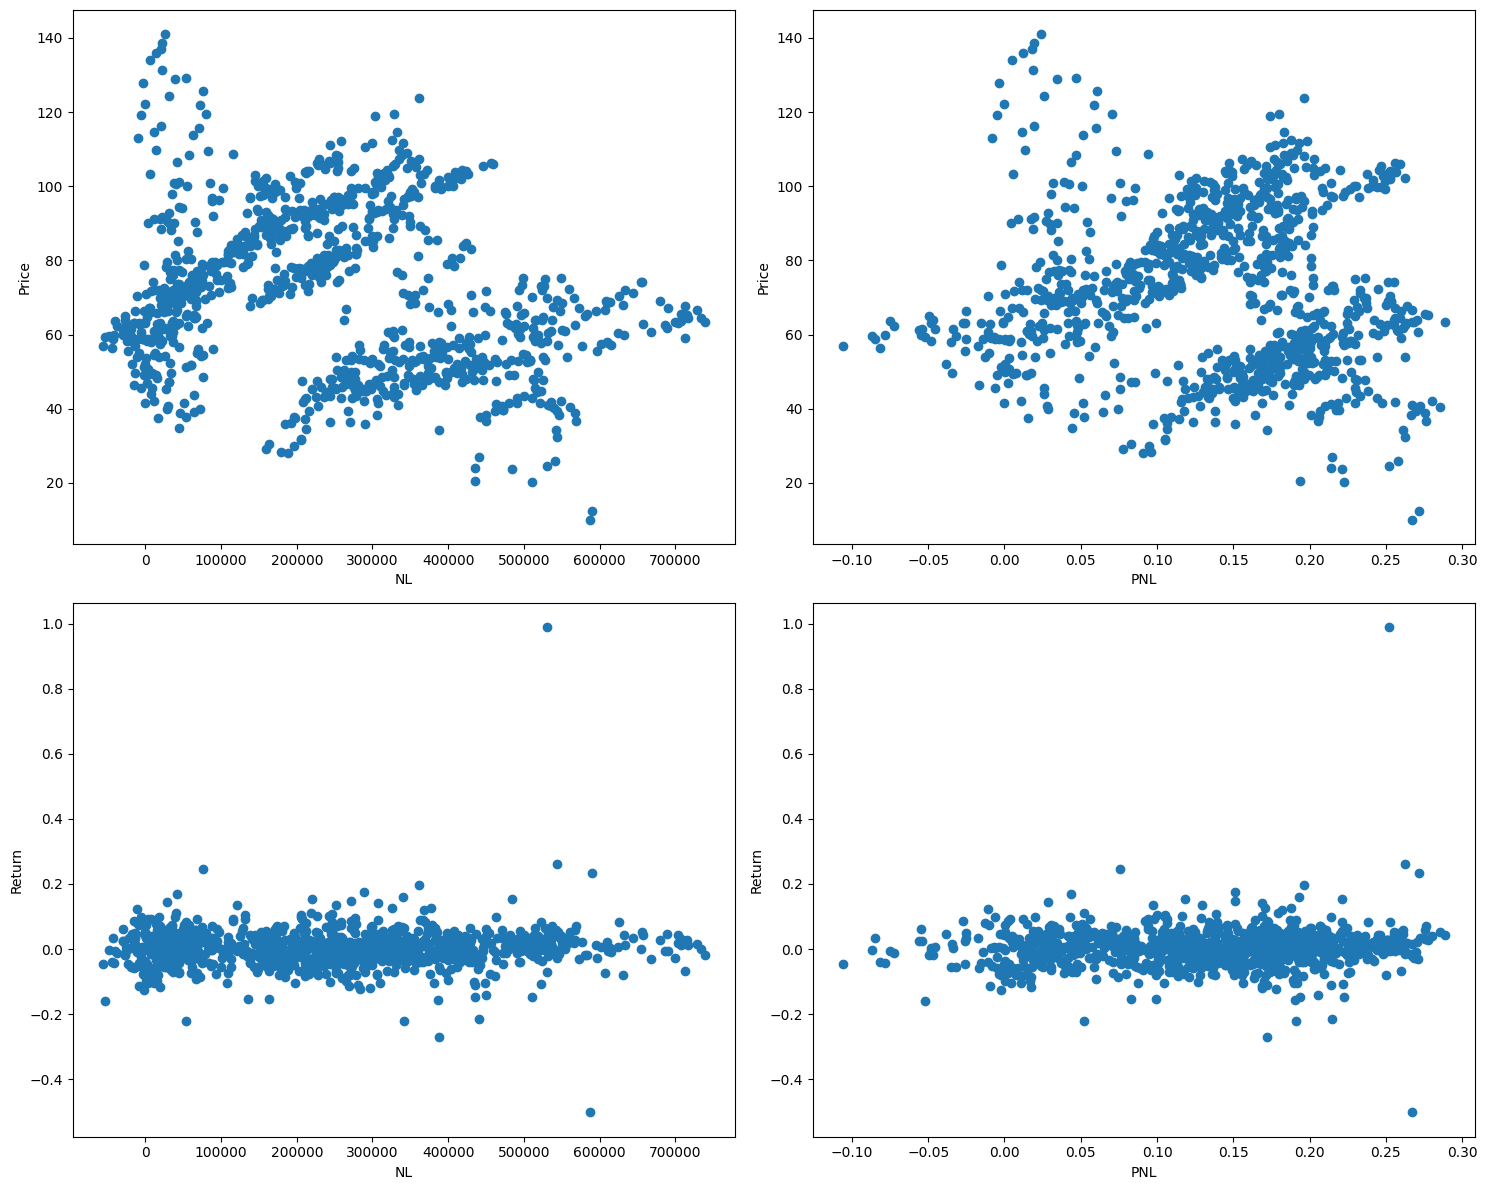

In [10]:
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(221)
plt.xlabel('NL')
plt.ylabel('Price')
ax1.scatter(df['NL'],df['Price'])

ax2 = fig.add_subplot(222)
plt.xlabel('PNL')
plt.ylabel('Price')
ax2.scatter(df['PNL'],df['Price'])

ax3 = fig.add_subplot(223)
plt.xlabel('NL')
plt.ylabel('Return')
ax3.scatter(df['NL'],df['Return'])

ax4 = fig.add_subplot(224)
plt.xlabel('PNL')
plt.ylabel('Return')
ax4.scatter(df['PNL'],df['Return'])

plt.tight_layout()
plt.savefig('Scatter Plot.png', format="png")
plt.show()

In [27]:
# It seems that we have 2 outliers for each graph, let's find what they are
print('1st', df[(df['NL'] > 55000) & (df['Price'] < 15)])
print('2nd', df[(df['PNL'] > 0.25) & (df['Price'] < 15)])
print('3rd', df[((df['NL'] > 55000) & (df['Return'] < -0.4)) | (df['Return'] > 0.8)])
print('4th', df[((df['PNL'] > 0.25) & (df['Return'] < -0.4)) | (df['Return'] > 0.8)])

1st            Date    Long   Short  Spread      NL       PNL  Price    Return
796  2020-04-21  736248  149068  655787  587180  0.267278  10.01 -0.502238
797  2020-04-28  737778  148390  641716  589388  0.271657  12.34  0.232767
2nd            Date    Long   Short  Spread      NL       PNL  Price    Return
796  2020-04-21  736248  149068  655787  587180  0.267278  10.01 -0.502238
797  2020-04-28  737778  148390  641716  589388  0.271657  12.34  0.232767
3rd            Date    Long   Short  Spread      NL       PNL      Price    Return
796  2020-04-21  736248  149068  655787  587180  0.267278  10.010000 -0.502238
798  2020-05-05  722912  192300  595388  530612  0.251954  24.559999  0.990275
4th            Date    Long   Short  Spread      NL       PNL      Price    Return
796  2020-04-21  736248  149068  655787  587180  0.267278  10.010000 -0.502238
798  2020-05-05  722912  192300  595388  530612  0.251954  24.559999  0.990275


In [35]:
df.drop(df[(df['Date'] >= '2020-04-21') & (df['Date'] <= '2020-05-05')].index, inplace=True)
df.to_csv('New Research Data.csv')

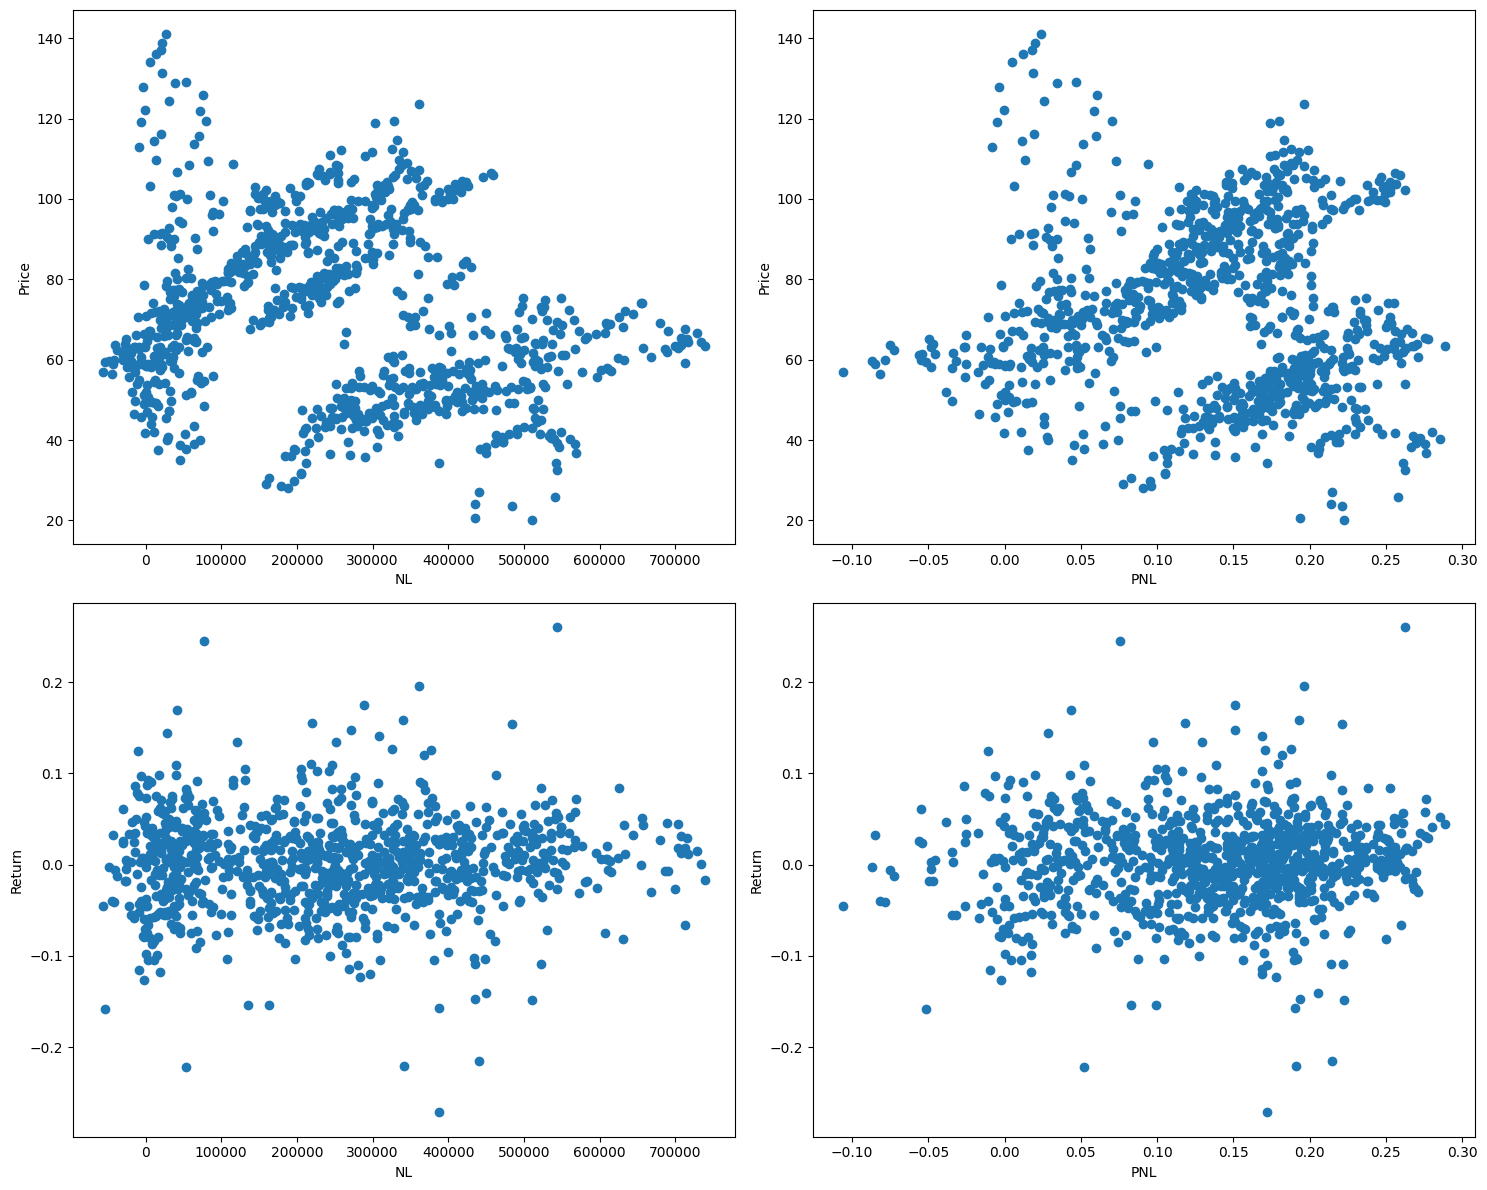

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('New Research Data.csv')

fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(221)
plt.xlabel('NL')
plt.ylabel('Price')
ax1.scatter(df['NL'],df['Price'])

ax2 = fig.add_subplot(222)
plt.xlabel('PNL')
plt.ylabel('Price')
ax2.scatter(df['PNL'],df['Price'])

ax3 = fig.add_subplot(223)
plt.xlabel('NL')
plt.ylabel('Return')
ax3.scatter(df['NL'],df['Return'])

ax4 = fig.add_subplot(224)
plt.xlabel('PNL')
plt.ylabel('Return')
ax4.scatter(df['PNL'],df['Return'])

plt.tight_layout()
plt.savefig('New Scatter Plot.png', format="png")
plt.show()

In [17]:
# Now we remove the extreme values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('New Research Data.csv')

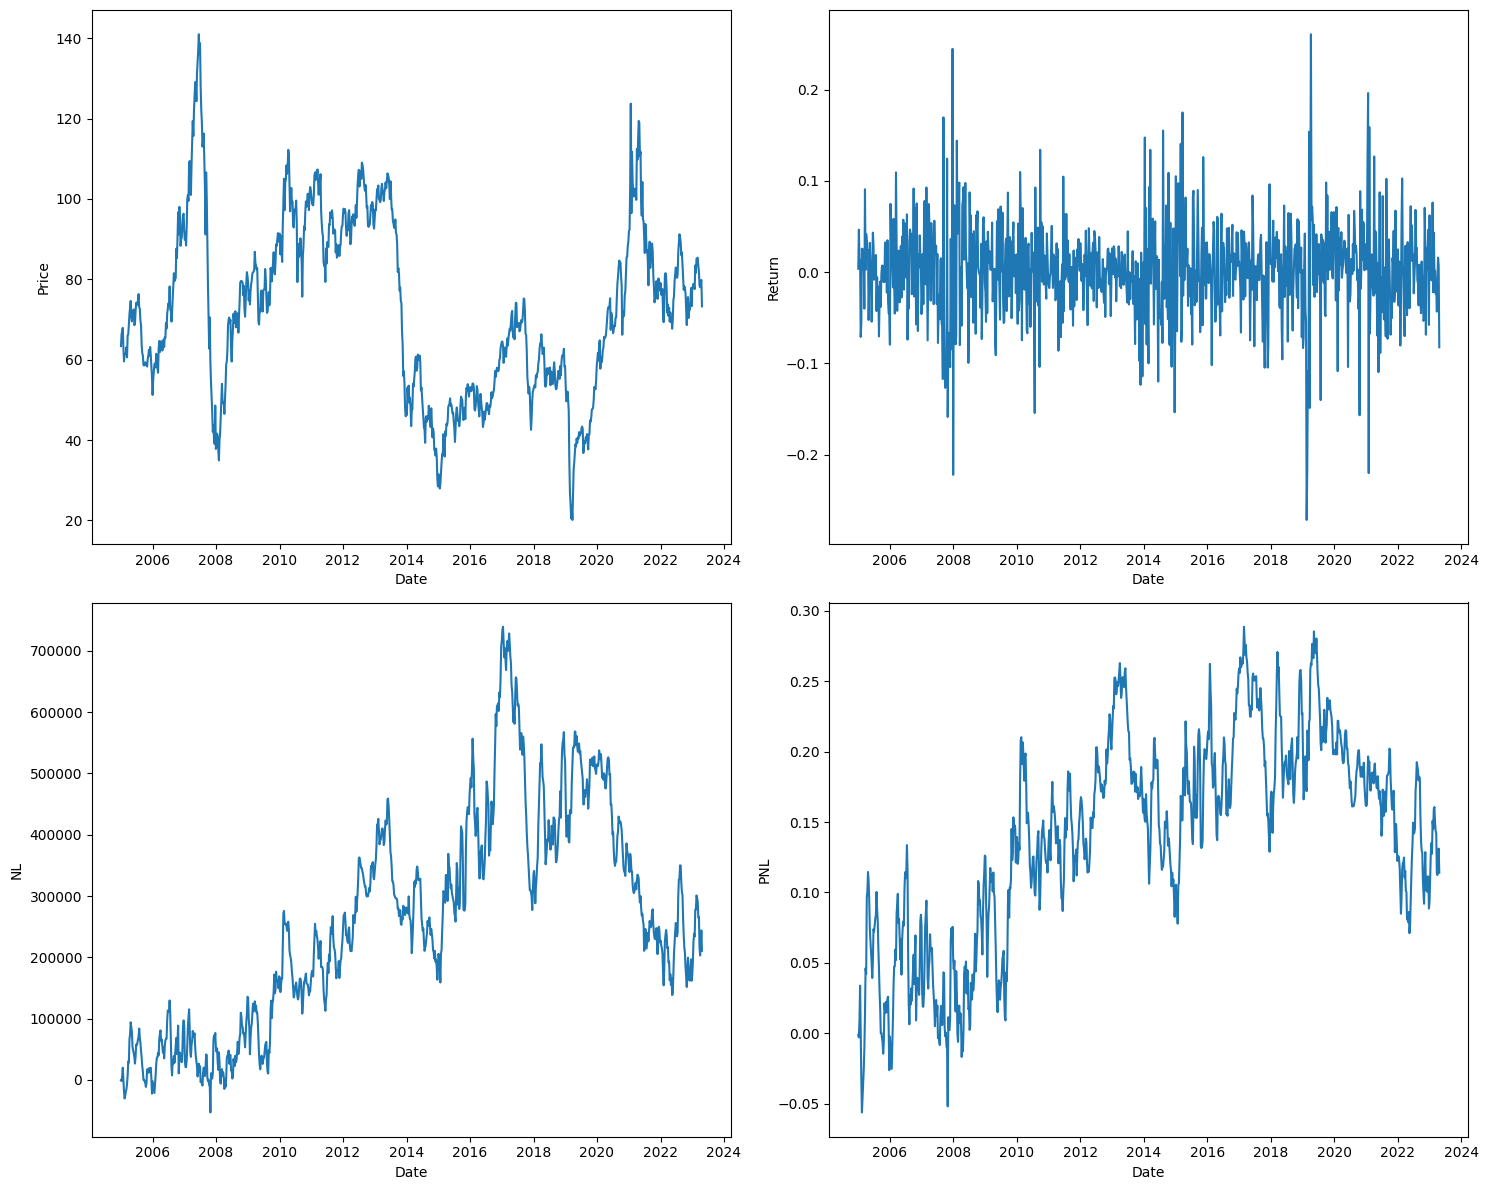

In [69]:
# Let's see if the time series are stationary
date = pd.date_range(start = '2005', periods = len(df), freq = 'W') # To demonstrate date by year

fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(221)
plt.xlabel('Date')
plt.ylabel('Price')
ax1.plot(date,df['Price'])

ax2 = fig.add_subplot(222)
plt.xlabel('Date')
plt.ylabel('Return')
ax2.plot(date,df['Return'])

ax3 = fig.add_subplot(223)
plt.xlabel('Date')
plt.ylabel('NL')
ax3.plot(date,df['NL'])

ax4 = fig.add_subplot(224)
plt.xlabel('Date')
plt.ylabel('PNL')
ax4.plot(date,df['PNL'])

plt.tight_layout()
plt.savefig('Time Series.png', format="png")
plt.show()

In [10]:
df.head()

,Unnamed: 0,Date,Long,Short,Spread,NL,PNL,Price,Return
0,0,2005-01-04,74567,67020,74091,7547,0.026045,43.910000,NaN
1,1,2005-01-11,79563,70949,90144,8614,0.026040,45.680000,0.040310
2,2,2005-01-18,86451,70526,85441,15925,0.048573,48.380001,0.059107
3,3,2005-01-25,98204,64354,90677,33850,0.098426,49.639999,0.026044
4,4,2005-02-01,100507,69555,96217,30952,0.085386,47.119999,-0.050766


In [20]:
# Load Statsmodels 
import statsmodels.api as sm
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
# Call the function and run the test
adf_test(df['Price'])
adf_test(df['Return'].dropna())
adf_test(df['NL'])
adf_test(df['PNL'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.821065
p-value                           0.055327
Lags Used                         3.000000
Number of Observations Used    1005.000000
Critical Value (1%)              -3.436873
Critical Value (5%)              -2.864420
Critical Value (10%)             -2.568304
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.658771e+01
p-value                        1.810496e-29
Lags Used                      2.000000e+00
Number of Observations Used    1.005000e+03
Critical Value (1%)           -3.436873e+00
Critical Value (5%)           -2.864420e+00
Critical Value (10%)          -2.568304e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -1.834418
p-value                          0.363513
Lags Used                       11.000000
Number of Observations Used    997.000000
Critical Value (1%)             -3.436926
Critical Value (5%)             -2.864443
Critical Value (

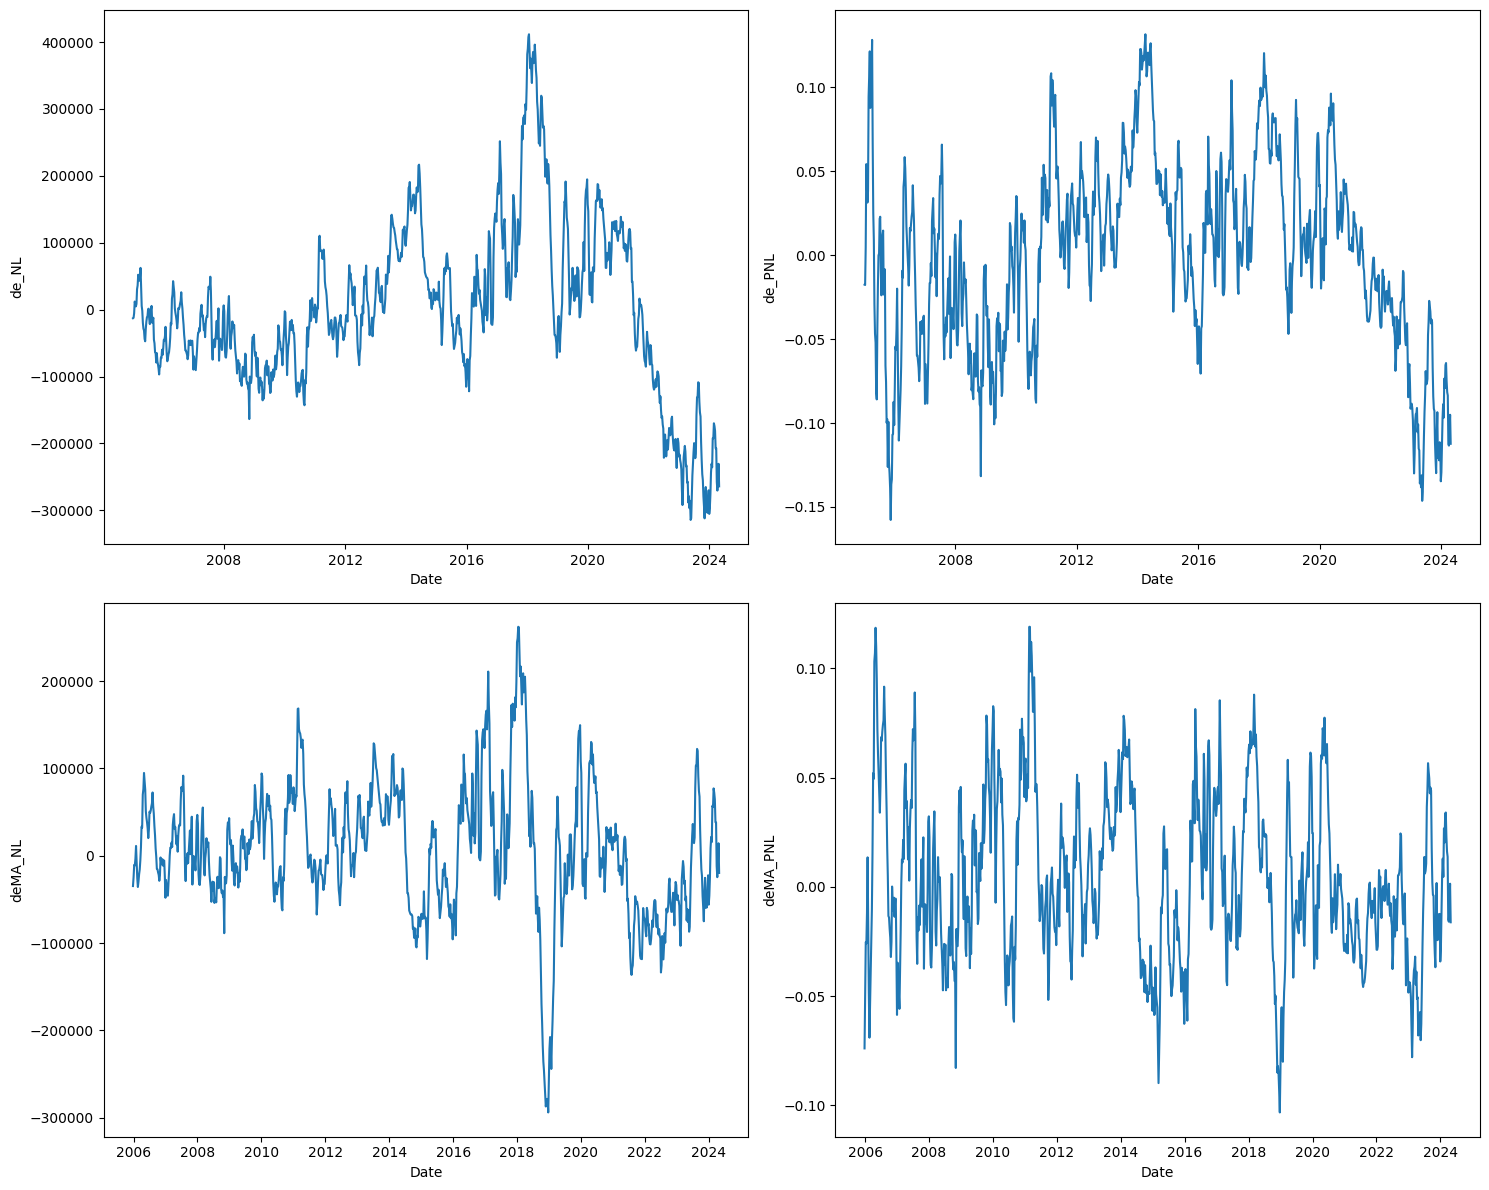

In [18]:
# It seems that the (percent) net positions are not stationary, and they demonstrate time trend when visualized.
# Thus, we have to detrend the series. I will try 2 ways: removing the linear trend and subtracting MA
from statsmodels.tsa.tsatools import detrend
de_NL = detrend(df['NL'])
MA = df['NL'].rolling(window=52).mean() # There are 52 weeks in a year, and the reports are released weekly
deMA_NL = df['NL'] - MA
de_PNL = detrend(df['PNL'])
MA_P = df['PNL'].rolling(window=52).mean()
deMA_PNL = df['PNL'] - MA_P

date = pd.date_range(start = '2005', periods = len(df), freq = 'W')

fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(221)
plt.xlabel('Date')
plt.ylabel('de_NL')
ax1.plot(date,de_NL)

ax3 = fig.add_subplot(222)
plt.xlabel('Date')
plt.ylabel('de_PNL')
ax3.plot(date,de_PNL)

ax2 = fig.add_subplot(223)
plt.xlabel('Date')
plt.ylabel('deMA_NL')
ax2.plot(date,deMA_NL)

ax4 = fig.add_subplot(224)
plt.xlabel('Date')
plt.ylabel('deMA_PNL')
ax4.plot(date,deMA_PNL)

plt.tight_layout()
plt.savefig('Detrended Data.png', format="png")
plt.show()

In [21]:
# It appears that removing moving average is a better way, let's test it again
df['Detrended NL'] = deMA_NL
df['Detrended PNL'] = deMA_PNL
adf_test(df['Detrended NL'].dropna())
adf_test(df['Detrended PNL'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -4.614058
p-value                          0.000122
Lags Used                       11.000000
Number of Observations Used    946.000000
Critical Value (1%)             -3.437281
Critical Value (5%)             -2.864600
Critical Value (10%)            -2.568399
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -5.380292
p-value                          0.000004
Lags Used                       19.000000
Number of Observations Used    938.000000
Critical Value (1%)             -3.437341
Critical Value (5%)             -2.864626
Critical Value (10%)            -2.568413
dtype: float64


In [22]:
# They are stationary
df.to_csv('New Research Data (with detrended data).csv')

In [1]:
### Check Causality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('New Research Data (with detrended data).csv')
df = df.dropna()
df[['Price', 'Return', 'Detrended NL', 'Detrended PNL']].corr()

C:\Users\jason wang\AppData\Local\Temp\ipykernel_13292\1151092897.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Price,Return,Detrended NL,Detrended PNL
Price,1.000000,0.073930,0.064031,0.159448
Return,0.073930,1.000000,0.126353,0.137988
Detrended NL,0.064031,0.126353,1.000000,0.827070
Detrended PNL,0.159448,0.137988,0.827070,1.000000


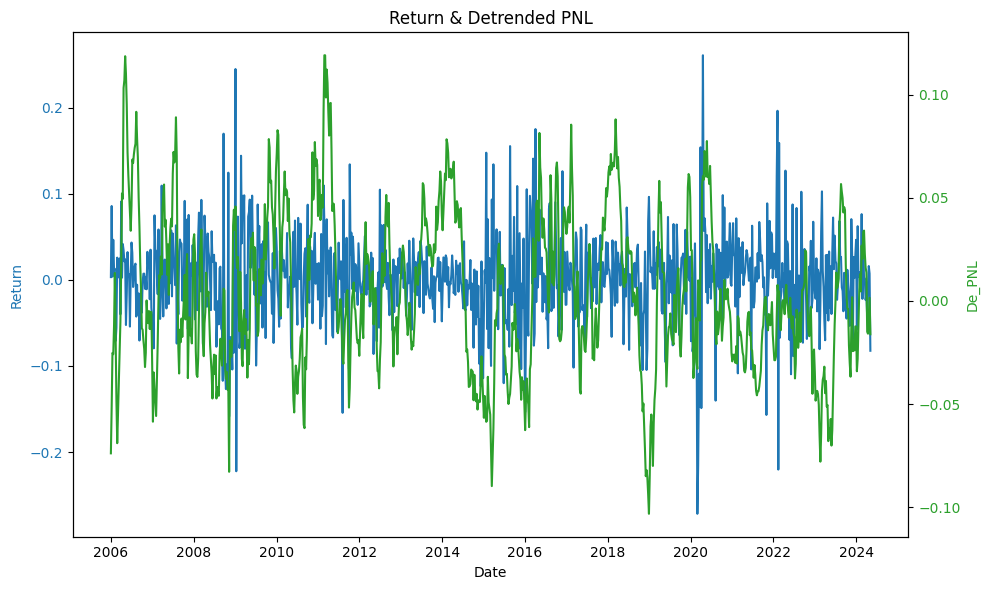

In [5]:
date = pd.date_range(start = '2006', periods = len(df), freq = 'W')

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line (left y-axis)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Return', color=color, rotation=90)
ax1.plot(date, df['Return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second line (right y-axis)
color = 'tab:green'
ax2.set_ylabel('De_PNL', color=color, rotation=90)
ax2.plot(date, df['Detrended PNL'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Return & Detrended PNL')

plt.tight_layout()
plt.savefig('Return & De_PNL.png', format="png")
plt.show()

In [3]:
# After detrending and the exploratory analysis, I decide to make cauality test on "return" and "percent net long positions".
# First find the suitable lags (m, n), and see who is leading the other or none.
from statsmodels.tsa.api import VAR
# Step 1: VAR model selection
model = VAR(df[['Return', 'Detrended PNL']])
results = model.fit(maxlags=5, ic='bic') # Get the lag order that minimizes BIC
results.summary() # We set the maximum lags to 5 so that there is no overfitting (the AIC result will be 14)

C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Jul, 2024
Time:                     19:29:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.6342
Nobs:                     956.000    HQIC:                  -14.6657
Log likelihood:           4316.47    FPE:                4.19123e-07
AIC:                     -14.6851    Det(Omega_mle):     4.14773e-07
--------------------------------------------------------------------
Results for equation Return
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.001404         0.001681            0.835           0.404
L1.Return               -0.021624         0.035865           -0.603           0.547
L1.Detrended PNL         0.117170         0.133

In [64]:
# Step 2: Granger causality test
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['Return', 'Detrended PNL']], [2], verbose=True)
grangercausalitytests(df[['Detrended PNL', 'Return']], [2], verbose=True)


Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1222  , p=0.3260  , df_denom=951, df_num=2
ssr based chi2 test:   chi2=2.2562  , p=0.3236  , df=2
likelihood ratio test: chi2=2.2535  , p=0.3241  , df=2
parameter F test:         F=1.1222  , p=0.3260  , df_denom=951, df_num=2

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6450  , p=0.0265  , df_denom=951, df_num=2
ssr based chi2 test:   chi2=7.3284  , p=0.0256  , df=2
likelihood ratio test: chi2=7.3005  , p=0.0260  , df=2
parameter F test:         F=3.6450  , p=0.0265  , df_denom=951, df_num=2


C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{2: ({'ssr_ftest': (3.6450337239805433, 0.02648613550795412, 951.0, 2),
   'ssr_chi2test': (7.328395878286855, 0.025624715625068965, 2),
   'lrtest': (7.3004500125007326, 0.02598528127021371, 2),
   'params_ftest': (3.6450337239801978, 0.0264861355079641, 951.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [6]:
# It's quite obvious that Return has granger causality on PNL, which means returns are leading the net long positions
# While the opposite is not
# Let's see if the 'current values' affect each other
from statsmodels.tsa.api import VAR
model_NL = VAR(df[['Return', 'Detrended PNL']], exog=df['Return'])
results = model_NL.fit(maxlags=5, ic='aic')
results.summary()

C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Jul, 2024
Time:                     15:16:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -84.4896
Nobs:                     956.000    HQIC:                  -84.5274
Log likelihood:           37714.2    FPE:                1.90607e-37
AIC:                     -84.5506    Det(Omega_mle):     1.88237e-37
--------------------------------------------------------------------
Results for equation Return
                      coefficient       std. error                 t-stat            prob
-----------------------------------------------------------------------------------------
const                    0.000000         0.000000                 10.455           0.000
Return                   1.000000         0.000000  45794367165240440.000           0.000
L1.Return              

In [9]:
from statsmodels.tsa.api import VAR
model_R = VAR(df[['Return', 'Detrended PNL']], exog=df['Detrended PNL'])
results = model_R.fit(maxlags=5, ic='bic')
results.summary()
# The bi-directional instant causality seems exist, which means the current value of one variable can help predict the other.

C:\Users\jason wang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, Jul, 2024
Time:                     15:34:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -84.5841
Nobs:                     958.000    HQIC:                  -84.5967
Log likelihood:           37810.8    FPE:                1.80620e-37
AIC:                     -84.6044    Det(Omega_mle):     1.79868e-37
--------------------------------------------------------------------
Results for equation Return
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.000709         0.001665            0.426           0.670
Detrended PNL         0.188179         0.043684            4.308           0.000

Results for equation Detrended PNL
                   coef

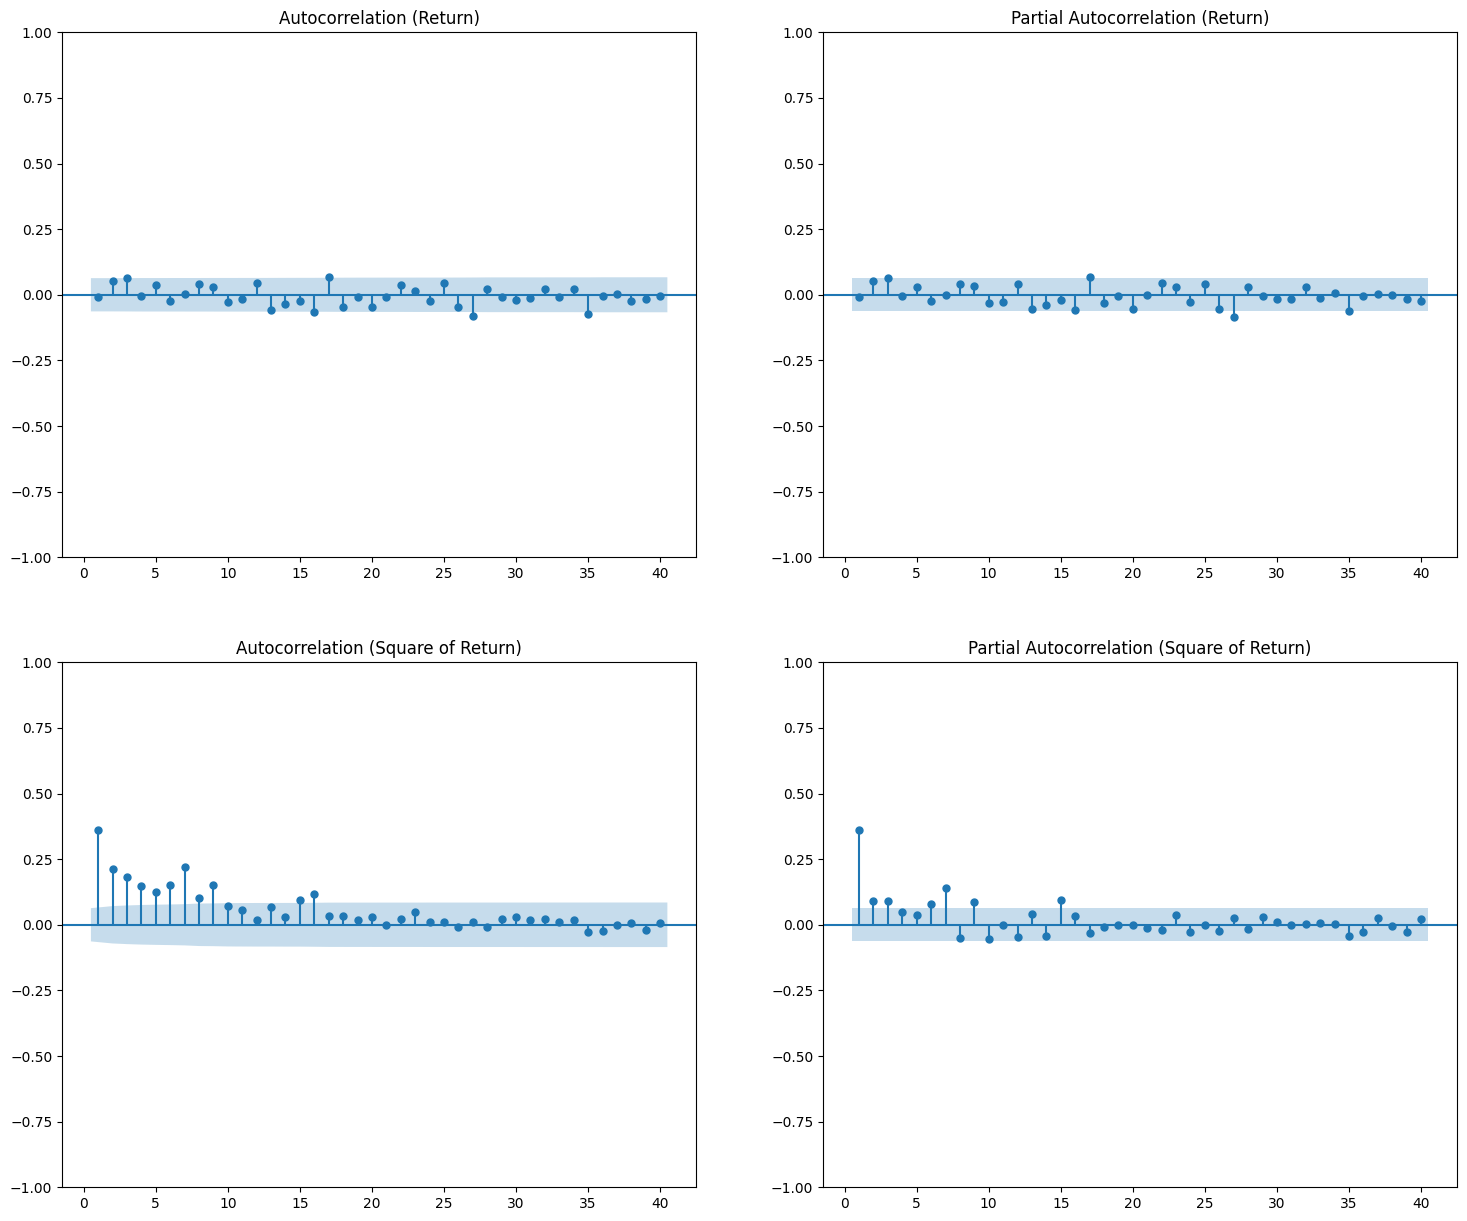

In [37]:
# Volatility
import statsmodels.graphics.tsaplots as sgt
fig, ax = plt.subplots(2, 2, figsize = (18,15))

sgt.plot_acf(df['Return'], zero = False, lags = 40, ax=ax[0][0], title='Autocorrelation (Return)')

sgt.plot_pacf(df['Return'], zero = False, lags = 40, ax=ax[0][1], title='Partial Autocorrelation (Return)')

sgt.plot_acf(df['Return']**2, zero = False, lags = 40, ax=ax[1][0], title='Autocorrelation (Square of Return)')

sgt.plot_pacf(df['Return']**2, zero = False, lags = 40, ax=ax[1][1], title='Partial Autocorrelation (Square of Return)')

plt.savefig('ACF & PACF.png', format="png")
plt.show()

In [33]:
# Use Ljung-Box test (Q-Statistics) to see if the residuals are "independently distributed"
from statsmodels.stats.diagnostic import acorr_ljungbox
print('Return', acorr_ljungbox(df['Return'], lags = 10, boxpierce=True))
print('Squared Return', acorr_ljungbox(df['Return']**2, lags = 10, boxpierce=True))

Return       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.053360   0.817316   0.053194   0.817596
2    2.662746   0.264114   2.651706   0.265576
3    6.611415   0.085371   6.579810   0.086568
4    6.628149   0.156893   6.596439   0.158814
5    8.017038   0.155299   7.975201   0.157608
6    8.478533   0.205098   8.432850   0.208075
7    8.489702   0.291397   8.443914   0.295081
8   10.270426   0.246556  10.206089   0.250858
9   11.098788   0.268998  11.024960   0.274002
10  11.740587   0.302793  11.658736   0.308545
Squared Return        lb_stat     lb_pvalue     bp_stat     bp_pvalue
1   125.662640  3.644614e-29  125.269944  4.442154e-29
2   168.478008  2.602948e-37  167.906914  3.463194e-37
3   200.375429  3.499791e-43  199.638204  5.050520e-43
4   221.451044  9.134170e-47  220.582096  1.404969e-46
5   236.486963  4.350464e-49  235.508378  7.052680e-49
6   258.450388  6.406149e-53  257.288774  1.134895e-52
7   305.138721  4.832686e-62  303.539404  1.061226e-61
8   315.089371  2.520

In [24]:
# It seems that the GARCH(1, 1) model may be the best fit since only the 1st lag is obvious
# 1. Standard Garch
from arch import arch_model
mdl_garch = arch_model(df['Return'], vol = 'GARCH', p = 1, q = 1)
garch = mdl_garch.fit()

# 2. GARCH with Net Positions Change
from arch import arch_model
df['D_NL'] = np.append(np.nan, np.diff(df['Detrended PNL'])/df['Detrended PNL'][:-1])
df = df.dropna()
mdl_garch_DNL = arch_model(df['Return'],x = df['D_NL'], mean='ARX', vol = 'GARCH', p = 1, q = 1)
garch_DNL = mdl_garch_DNL.fit()

# 3. GARCH-M, it is for testing the risk-return rationality
from arch.univariate import ARCHInMean, GARCH
garch_m = ARCHInMean(df['Return'], volatility=GARCH(), lags=[1])
garch_M = garch_m.fit()

# 4. GARCH-M with Net Positions Change
from arch.univariate import ARCHInMean, GARCH
garch_m_DNL = ARCHInMean(df['Return'], x=df['D_NL'], volatility=GARCH(), lags=[1])
garch_M_DNL = garch_m_DNL.fit()

print('GARCH: ','\n', garch.summary)
print('GARCH_DNL: ','\n', garch_DNL.summary)
print('GARCH-M: ','\n', garch_M.summary)
print('GARCH-M_DNL: ','\n', garch_M_DNL.summary)

C:\Users\jason wang\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002677. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jason wang\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\jason wang\anaconda3\Lib\site-packages\arch\univariate\base.py

Iteration:      1,   Func. Count:      6,   Neg. LLF: 56019434.31682349
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1039.8274306691235
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7383080.301823759
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1401.8163980820943
Iteration:      5,   Func. Count:     44,   Neg. LLF: -1330.9951029755548
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1507.5424814953153
Iteration:      7,   Func. Count:     59,   Neg. LLF: -1569.0972935435975
Iteration:      8,   Func. Count:     64,   Neg. LLF: -1569.101849246837
Iteration:      9,   Func. Count:     69,   Neg. LLF: -1569.102011857605
Iteration:     10,   Func. Count:     74,   Neg. LLF: -1569.102028924836
Iteration:     11,   Func. Count:     78,   Neg. LLF: -1569.102028924788
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1569.102028924836
            Iterations: 11
            Function evaluations: 78
            Gradient e

In [34]:
from statsmodels.stats.diagnostic import het_arch
print('GARCH: ''\n', het_arch(garch.resid))
print('GARCH_DNL: ','\n', het_arch(garch_DNL.resid))
print('GARCH-M: ','\n', het_arch(garch_M.resid.dropna()))
print('GARCH-M_DNL: ','\n', het_arch(garch_M_DNL.resid.dropna()))

GARCH: 
 (176.45016180763506, 1.2776235122655621e-32, 21.42879091273071, 3.1825172564528794e-36)
GARCH_DNL:  
 (179.27499317627982, 3.313385905548195e-33, 21.856965986719167, 6.014195925375641e-37)
GARCH-M:  
 (141.71957769314616, 1.871677609372637e-25, 16.475323962633585, 1.2037134237142788e-27)
GARCH-M_DNL:  
 (145.19703485610387, 3.6192546322456943e-26, 16.952887726391292, 1.7469278033192763e-28)


In [ ]:
# The risk seems have no significant effect on oil price
# But the 'current' Net Position Changes can significant help predict the price
# Other than that, we see volatility clustering in all models, which means the volatility tends to be also large if the past value is large
# Therefore, the 2nd model (GARCH with Net Positions Change as an exogenous variable) may be the best fit

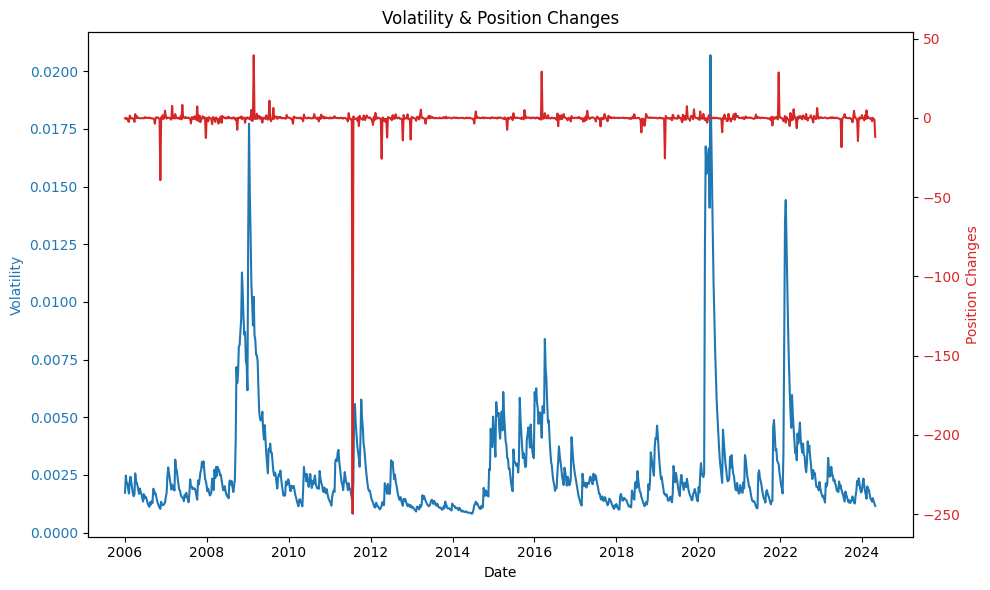

In [38]:
# Let's plot the 2nd model to see if volatility clustering exists and the corresponding change in net positions
date = pd.date_range(start = '2006', periods = len(df), freq = 'W') # To demonstrate date by year
vol = garch_DNL.conditional_volatility**2

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line (left y-axis)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility', color=color, rotation=90)
ax1.plot(date, vol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second line (right y-axis)
color = 'tab:red'
ax2.set_ylabel('Position Changes', color=color, rotation=90)
ax2.plot(date, df['D_NL'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Volatility & Position Changes')

plt.tight_layout()
plt.savefig('Volatility & Position Changes.png', format="png")
plt.show()

In [92]:
# i. Oil Futures peculative traders are trend followers
# ii. Risk doesn't determine price, it's not rational and help prove the first conclusion
# iii. Volatility clustering causes large net position changes

(145.19703485610387,
 3.6192546322456943e-26,
 16.952887726391292,
 1.7469278033192763e-28)